<a href="https://colab.research.google.com/github/Tansiv/ML-CSE475/blob/main/CSE475(3)LAB_3(UPDATED).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn imbalanced-learn xgboost matplotlib seaborn shap lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0276dc3fa7070bdef1785112252c6e9035d3088c24524f5df51edc2a629a2666
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [2]:
# ===================
# 1. Import Libraries
# ===================
# Import necessary libraries for data handling, modeling, and evaluation.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
)
from imblearn.over_sampling import SMOTE
import shap
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully.")


Libraries imported successfully.


In [3]:
# ==========================================
# 2. Load Dataset and Perform Preprocessing
# ==========================================
# Assuming the dataset is downloaded and located in the current directory.
# Use kagglehub for importing the dataset if required.

import kagglehub
path = kagglehub.dataset_download("abdelazizsami/cdc-diabetes-health-indicators")

# Load the dataset
data = pd.read_csv(f"{path}/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Split features (X) and target (y)
X = data.drop(columns=['Diabetes_binary'])  # Features
y = data['Diabetes_binary']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data loaded and preprocessing complete.")


100%|██████████| 6.03M/6.03M [00:00<00:00, 102MB/s]

Extracting files...


Data loaded and preprocessing complete.


In [6]:
df= data
df.head()
df.info()
df = df.dropna()
df
df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# ================================
# 3. Train Individual Models
# ================================
# Train the ensemble models (Random Forest, Gradient Boosting, XGBoost).

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, scale_pos_weight=1.5, random_state=42, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

print("Individual models trained successfully.")

Individual models trained successfully.


In [8]:
# =========================
# 4. Create Ensemble Models
# =========================
# Combine models using VotingClassifier and StackingClassifier.

# Voting Classifier
voting_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model),
        ('xgb', xgb_model)
    ],
    voting='soft'
)
voting_model.fit(X_train, y_train)

# Stacking Classifier
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42))
]
meta_model = LogisticRegression()
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_model.fit(X_train, y_train)

print("Ensemble models created successfully.")


Ensemble models created successfully.



=== Random Forest ===
Accuracy: 0.7343
Precision: 0.7157
Recall: 0.7773
F1 Score: 0.7452
ROC AUC: 0.8084

Confusion Matrix:


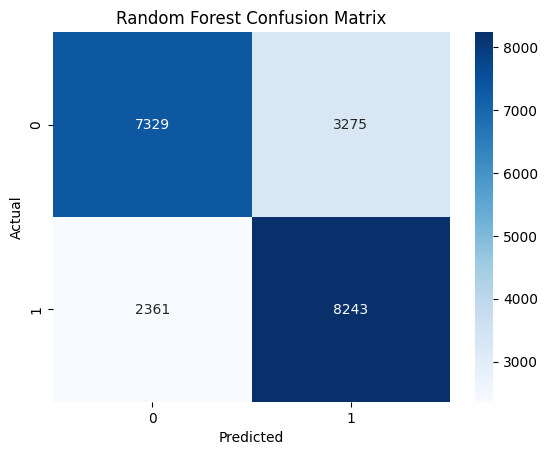


=== Gradient Boosting ===
Accuracy: 0.7532
Precision: 0.7322
Recall: 0.7983
F1 Score: 0.7638
ROC AUC: 0.8299

Confusion Matrix:


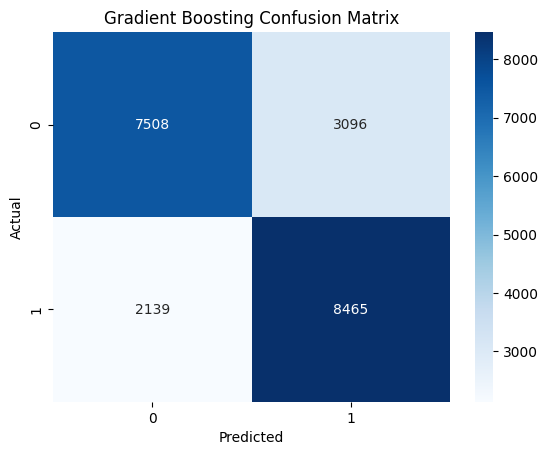


=== XGBoost ===
Accuracy: 0.7459
Precision: 0.6958
Recall: 0.8737
F1 Score: 0.7747
ROC AUC: 0.8291

Confusion Matrix:


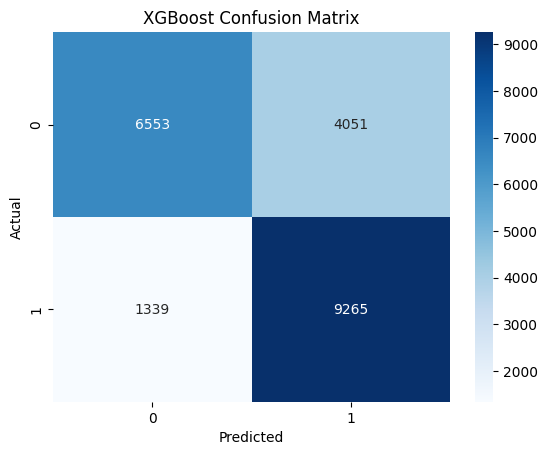


=== Voting Classifier ===
Accuracy: 0.7515
Precision: 0.7174
Recall: 0.8299
F1 Score: 0.7695
ROC AUC: 0.8282

Confusion Matrix:


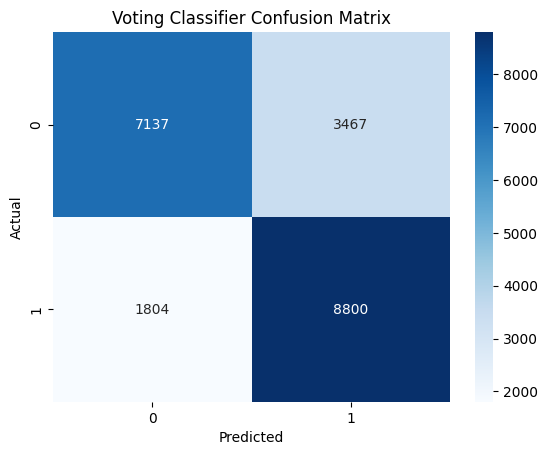


=== Stacking Classifier ===
Accuracy: 0.7508
Precision: 0.7328
Recall: 0.7892
F1 Score: 0.7600
ROC AUC: 0.8281

Confusion Matrix:


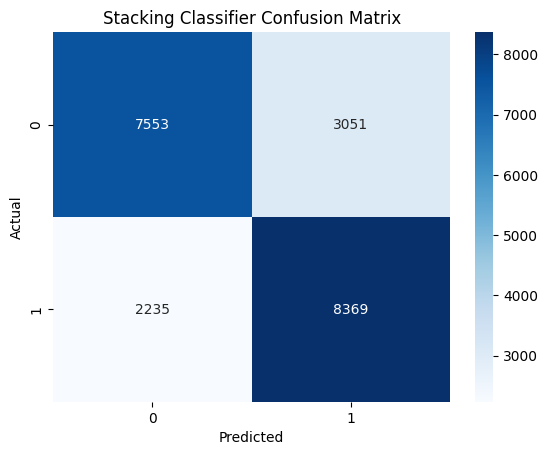


=== Performance Comparison Table ===
                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0        Random Forest  0.734251   0.715662  0.777348  0.745231  0.808439
1    Gradient Boosting  0.753159   0.732203  0.798284  0.763817  0.829870
2              XGBoost  0.745851   0.695780  0.873727  0.774666  0.829083
3    Voting Classifier  0.751462   0.717372  0.829876  0.769533  0.828168
4  Stacking Classifier  0.750754   0.732837  0.789230  0.759989  0.828130


In [11]:
# ==========================
# 5. Evaluate Models
# ==========================
# Evaluate models on the test set and compare their performance.

# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define evaluation function
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    cm = confusion_matrix(y_test, y_pred)

    # Print metrics
    print(f"\n=== {model_name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if auc:
        print(f"ROC AUC: {auc:.4f}")
    print("\nConfusion Matrix:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

    return {"Model": model_name, "Accuracy": acc, "Precision": precision, "Recall": recall, "F1 Score": f1, "AUC": auc}

# Define the models dictionary
# This stores all trained models for easy access during evaluation
models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'XGBoost': xgb_model,
    'Voting Classifier': voting_model,
    'Stacking Classifier': stacking_model
}

# Evaluate all models and collect results
performance_results = []
for name, model in models.items():
    result = evaluate_model(model, X_test, y_test, name)
    performance_results.append(result)

# Convert the results to a DataFrame
performance_df = pd.DataFrame(performance_results)

# Display the performance comparison table
print("\n=== Performance Comparison Table ===")
print(performance_df)

# Save the results to a CSV file for documentation
performance_df.to_csv("model_performance_comparison.csv", index=False)

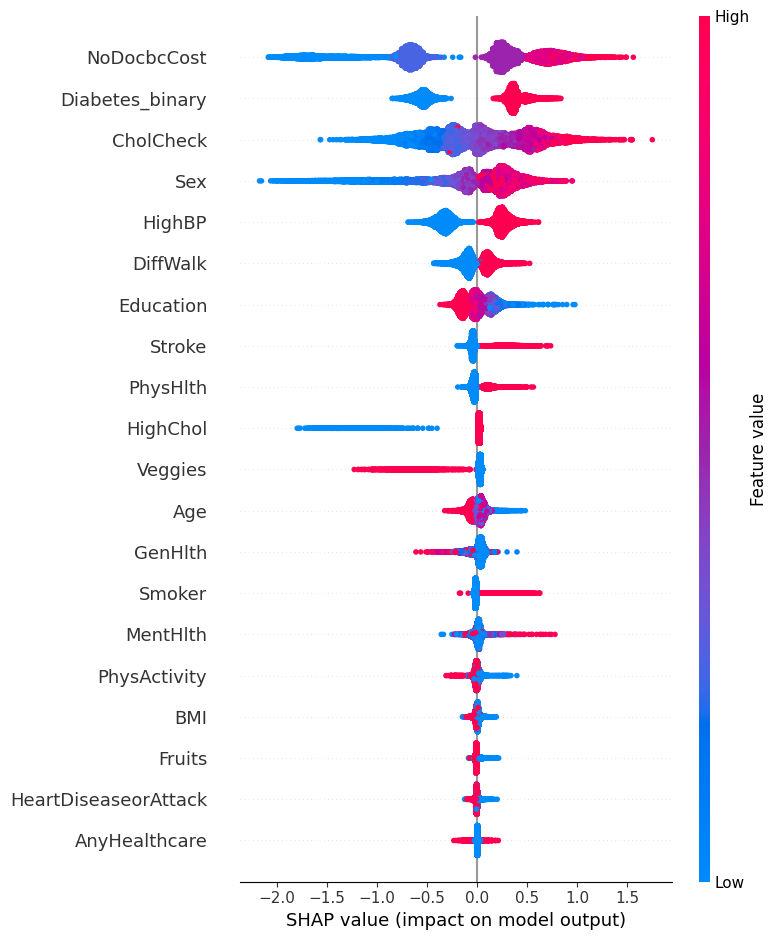

In [12]:
# ==========================
# 6. Explainable AI (SHAP)
# ==========================
# Global and local interpretability with SHAP.

# SHAP for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Global feature importance
shap.summary_plot(shap_values, X_test, feature_names=data.columns[:-1])

# Local feature explanation (first test instance)
test_instance = X_test[0]
shap.force_plot(
    explainer.expected_value,
    shap_values[0],
    test_instance,
    feature_names=data.columns[:-1]
)

print("SHAP analysis completed.")


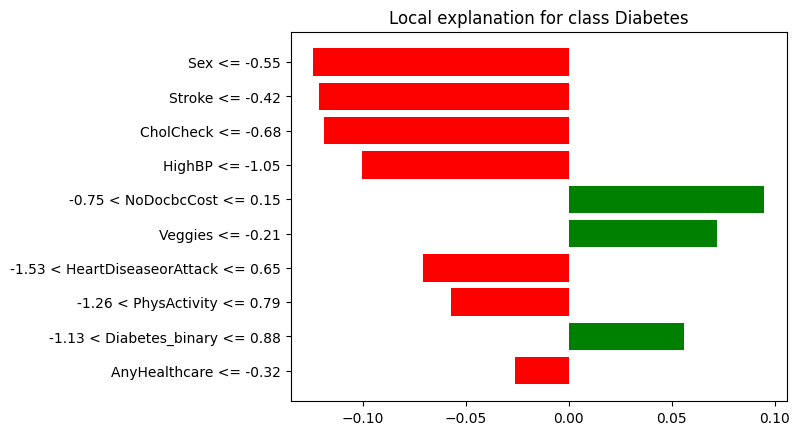

LIME analysis completed.


In [14]:
# ==========================
# 7. Explainable AI (LIME)
# ==========================
# Local interpretability with LIME.

lime_explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=data.columns[:-1],
    class_names=["No Diabetes", "Diabetes"],
    mode="classification"
)

lime_exp = lime_explainer.explain_instance(
    data_row=X_test[0],
    predict_fn=xgb_model.predict_proba,
    num_features=10
)
lime_exp.show_in_notebook(show_table=True)
lime_exp.as_pyplot_figure()
plt.show()

print("LIME analysis completed.")


In [ ]:
# ==================================
# Hyperparameter Tuning for Models
# ==================================
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [10, 20, None],
        "min_samples_split": [2, 5, 10],
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10],
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10],
        "scale_pos_weight": [1, 1.5, 2],
    },
}

# Function to perform GridSearchCV for a model
def perform_grid_search(model, param_grid, model_name):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring="accuracy",
        cv=5,
        verbose=1,
        n_jobs=-1,
    )
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_:.4f}")
    return grid_search.best_estimator_

# Perform GridSearchCV for each model
optimized_models = {
    "Random Forest": perform_grid_search(RandomForestClassifier(random_state=42), param_grids["Random Forest"], "Random Forest"),
    "Gradient Boosting": perform_grid_search(GradientBoostingClassifier(random_state=42), param_grids["Gradient Boosting"], "Gradient Boosting"),
    "XGBoost": perform_grid_search(XGBClassifier(eval_metric="logloss", random_state=42), param_grids["XGBoost"], "XGBoost"),
}

print("Hyperparameter tuning completed.")


Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
# =======================================
# Evaluate Optimized Models on Test Data
# =======================================

# Evaluate each optimized model
optimized_results = {}
for name, model in optimized_models.items():
    print(f"Evaluating {name} (Optimized)...")
    optimized_results[name] = evaluate_model(model, X_test, y_test, f"{name} (Optimized)")

# Convert results to a DataFrame
optimized_results_df = pd.DataFrame(optimized_results).T
print("\nOptimized Models Performance:")
print(optimized_results_df)


In [ ]:
# =============================
# Combine and Compare Results
# =============================
# Combine results of original and optimized models for comparison.

# Combine both original and optimized results
combined_results = results_df.join(optimized_results_df, lsuffix="_Original", rsuffix="_Optimized")

# Display results as a comparison table
print("\nComparison Table (Original vs Optimized):")
print(combined_results)

# Save the comparison table to a CSV file for documentation
combined_results.to_csv("model_comparison.csv", index=True)


In [ ]:
# Optional: Visualization of Comparison
combined_results.plot(kind="bar", figsize=(12, 8), title="Model Comparison (Original vs Optimized)")
plt.ylabel("Scores")
plt.xticks(rotation=45)
plt.show()
